Cristina Cicali, Clelia Corridori, Anna Steffinlongo

# OTOC


In [1]:
import libraries
from OTOCfunc import *
from LYAPfunc import *


In [2]:
N=2**14
T=[2**-2,2**-4,2**-6,2**-8]
trials=1
K=4
Nkicks=100

mean_C=mean_otoc_heff(N,T,K,Nkicks,True)
Kick=arange(1,Nkicks+1,1)

Trial # 0


In [3]:
# to save OTOC to file
saveF=False
if saveF==True:
    save(mean_C,'OTOC-T7-N14-1t.txt')

In [4]:
# to load data
load=False
if load==True:
    N=2**14
    T=[2**-2,2**-4,2**-6,2**-8]
    K=4
    Nkicks=100
    Kick=arange(1,Nkicks+1,1)

    data = loadtxt("OTOC1-3.txt", comments="#", delimiter="\n", unpack=False)
    mean_C=reshape(data.astype(float),(Nkicks,len(K)))

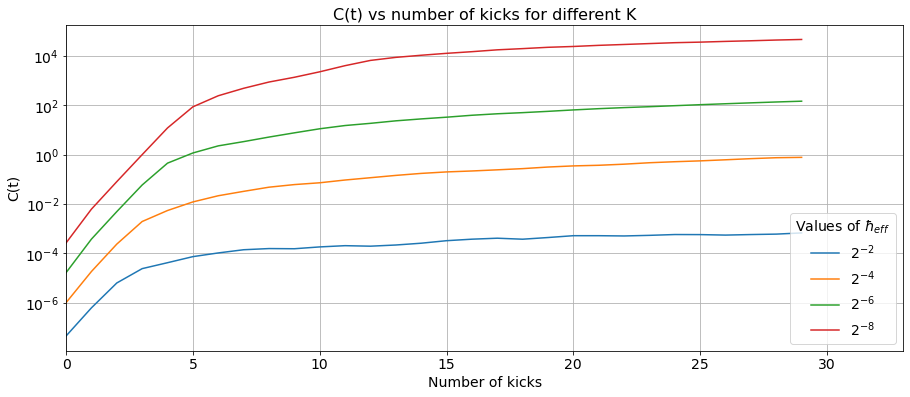

In [8]:
# OTOC plot
plt.figure(figsize=(15, 6))
plt.yscale('log')

for ii in range(len(T)):
    plt.plot(Kick[:30],mean_C[:30,ii])    
label=['$2^{-2}$','$2^{-4}$','$2^{-6}$','$2^{-8}$']

plt.legend(label, loc='lower right',title='Values of $\hbar_{eff}$', fontsize='14',title_fontsize=14)
plt.xlim([0,33])
plt.xlabel('Number of kicks', size=14)
plt.ylabel('C(t)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('C(t) vs number of kicks for different K', size=16) #decite if we want comment it
plt.grid()
plt.savefig('OTOC-heff.png', dpi=100)

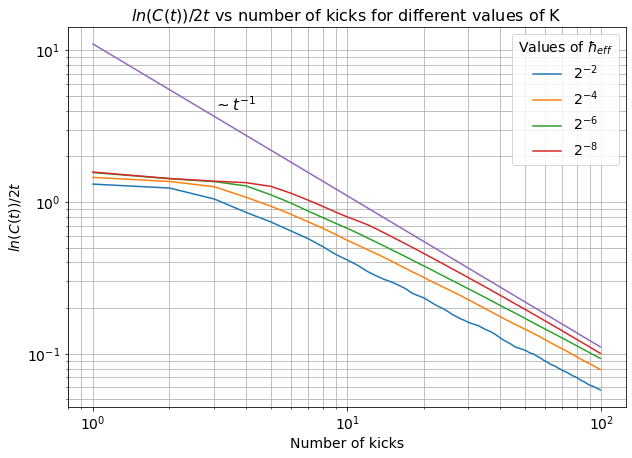

In [6]:
Kick=arange(0,Nkicks,1)
#Compute lambda from the growth of the OTOC
lmb=zeros([Nkicks,len(T)])

for jj in range(1,Nkicks):
    lmb[jj,:]=log(mean_C[jj,:]/mean_C[0,:])/(2*jj)

#lambda vs t plot
plt.figure(figsize=(10, 7))
plt.xscale('log')
plt.yscale('log')
for kk in range(len(T)):
    plt.plot(arange(1,Nkicks),lmb[1:,kk]) 
label=['$2^{-2}$','$2^{-4}$','$2^{-6}$','$2^{-8}$']

# asymptotic behaviour
def asymp(Kick):
    return((1/Kick[1:])*11)

funz_t=asymp(Kick)
plt.plot(Kick[1:],funz_t[:])
plt.text(3, 4, "$\sim t^{-1}$", fontsize=15)
plt.legend(label, loc='upper right', title='Values of $\hbar_{eff}$', title_fontsize=14, fontsize=14)
plt.xlabel('Number of kicks', size=14)
plt.ylabel('$ln (C(t)) /2t$', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('$ln (C(t)) /2t$ vs number of kicks for different values of K', size=16)
plt.savefig('OTOClog-log.png', dpi=100)
plt.grid(True, which="both")

plt.savefig('OTOClog-log-heff.png', dpi=100)

In [7]:
#to compute the Erenfest time faslty for k=10
abs(log(2**-8))/(log(10/2))

3.4454124645871445